# Linear Regression in PyTorch

In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

from torch import optim

Text(0.5,1,'Random, Linear Data')

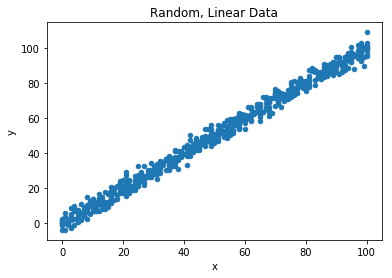

In [2]:
train_df, test_df = map(pd.read_csv, ('train.csv', 'test.csv'))
train_df, test_df = train_df.dropna(), test_df.dropna()  # remove the entries that contain NAN values
train_df.plot(kind='scatter', x='x', y='y')
plt.title('Random, Linear Data')

Text(0.5,1,'Random, Linear Data (Test version)')

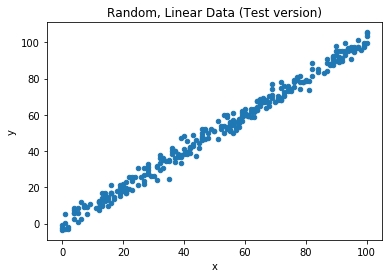

In [3]:
test_df.plot(kind='scatter', x='x', y='y')
plt.title('Random, Linear Data (Test version)')

In [4]:
def to_tensors(df):
    return map(torch.from_numpy, (df.x.astype('float32').values, df.y.astype('float32').values))

# Convert to tensors
(x_train, y_train), (x_test, y_test) = map(to_tensors, (train_df, test_df))

# Transpose
x_train, y_train, x_test, y_test = map(lambda tensor: tensor.view(-1, 1),
                                       (x_train, y_train, x_test, y_test))

In [5]:
# function to mean normalize the data (required for faster convergence:)
def mean_normalize(data, mean=None, std=None):
    if mean is None and std is None:
        mean = data.mean()
        std = data.mean()
        
    data = (data - mean) / std
    
    return data, mean, std

In [6]:
# normalize the training data:
(x_train, x_mn, x_std), (y_train, y_mn, y_std) = mean_normalize(x_train), mean_normalize(y_train)

In [7]:
# normalize the test data using the original (training) means and stds
(x_test, _, _), (y_test, _, _) = mean_normalize(x_test, x_mn, x_std), mean_normalize(y_test, y_mn, y_std)

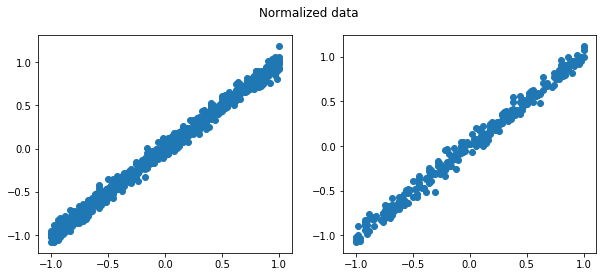

In [8]:
# plot the normalized data to make sure that only scale of the original data has changed
plt.figure(figsize=(10, 4)).suptitle("Normalized data")
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train);
plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test);

You can notice that the data has only changed it's scale. And not lost it's inherent nature. This is very essential for your machine learning model to converge faster

In [9]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        return self.linear(x)

In [10]:
model = LinearRegression()
criterion = torch.nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [11]:
n_epochs = 100
for i in range(n_epochs):
    # inputs, target = map(Variable, (x_train, y_train))  # not required in current stable version
    # Variable is deprecated
    
    inputs, target = (x_train, y_train)  # mere formality
    
    # Propagate forwards
    output = model(inputs)
    loss = criterion(output, target)
    
    # Propagate backwards
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i % 20 == 0:
        print('Epoch {0}/{1} loss: {2:.6f}'.format(i, n_epochs, loss))
        
# model.eval()  # no need to turn the model into eval mode because there are no
# dual behaviour layers in the model such as BatchNorm and dropouts

Epoch 0/100 loss: 0.056480
Epoch 20/100 loss: 0.004625
Epoch 40/100 loss: 0.003246
Epoch 60/100 loss: 0.003160
Epoch 80/100 loss: 0.003155


See the model converges only in 100 epochs

In [12]:
# Now test the model performance on the test data:
test_output = model(x_test)
test_loss = criterion(test_output, y_test)
print("Obtain test MSE loss:", test_loss.item())

Obtain test MSE loss: 0.0037846476770937443


There is absolutely no variance problem. The model has generalised very well. Plus, the obtained loss is of the order of 1e-2 which is quite a good performance. The reason for this is the simplicity of the data.